In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
pd.set_option('display.max_columns', None)

In [33]:
df = pd.read_csv("/Users/andreaslebec/Mon_Mac/Documents/esilv/A4/semestre_1/python_science/Projet/ObesityDataSet_raw_and_data_sinthetic.csv")


In [34]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [37]:
df.rename(columns = {"family_history_with_overweight": "genetic",
                          "FAVC": "high_calorific",
                          "FCVC": "vegetable",
                          "NCP": "frequence_meal",
                          "CAEC": "between_meal",
                          "SMOKE": "smoke",
                          "CH2O": "water",
                          "SCC": "calories_monitoring",
                          "FAF": "physical_activity",
                          "TUE": "technology_time",
                          "CALC": "alcohol",
                          "MTRANS": "transportation",
                          "NObeyesdad": "obesity"
                         },inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               2111 non-null   object 
 1   Age                  2111 non-null   float64
 2   Height               2111 non-null   float64
 3   Weight               2111 non-null   float64
 4   genetic              2111 non-null   object 
 5   high_calorific       2111 non-null   object 
 6   vegetable            2111 non-null   float64
 7   frequence_meal       2111 non-null   float64
 8   between_meal         2111 non-null   object 
 9   smoke                2111 non-null   object 
 10  water                2111 non-null   float64
 11  calories_monitoring  2111 non-null   object 
 12  physical_activity    2111 non-null   float64
 13  technology_time      2111 non-null   float64
 14  alcohol              2111 non-null   object 
 15  transportation       2111 non-null   o

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               2087 non-null   object 
 1   Age                  2087 non-null   float64
 2   Height               2087 non-null   float64
 3   Weight               2087 non-null   float64
 4   genetic              2087 non-null   object 
 5   high_calorific       2087 non-null   object 
 6   vegetable            2087 non-null   float64
 7   frequence_meal       2087 non-null   float64
 8   between_meal         2087 non-null   object 
 9   smoke                2087 non-null   object 
 10  water                2087 non-null   float64
 11  calories_monitoring  2087 non-null   object 
 12  physical_activity    2087 non-null   float64
 13  technology_time      2087 non-null   float64
 14  alcohol              2087 non-null   object 
 15  transportation       2087 non-null   o

In [41]:
pd.get_dummies(df)

,Age,Height,Weight,vegetable,frequence_meal,water,physical_activity,technology_time,Gender_Female,Gender_Male,genetic_no,genetic_yes,high_calorific_no,high_calorific_yes,between_meal_Always,between_meal_Frequently,between_meal_Sometimes,between_meal_no,smoke_no,smoke_yes,calories_monitoring_no,calories_monitoring_yes,alcohol_Always,alcohol_Frequently,alcohol_Sometimes,alcohol_no,transportation_Automobile,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking,obesity_Insufficient_Weight,obesity_Normal_Weight,obesity_Obesity_Type_I,obesity_Obesity_Type_II,obesity_Obesity_Type_III,obesity_Overweight_Level_I,obesity_Overweight_Level_II
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


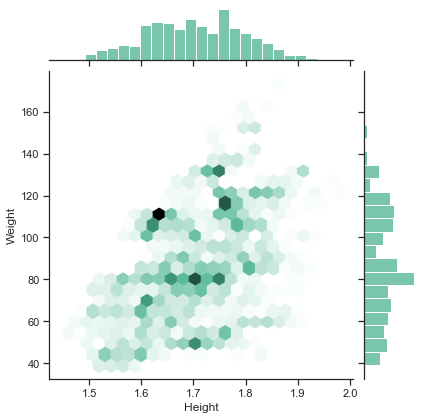

In [42]:
sns.set_theme(style="ticks")



sns.jointplot(x=df["Height"], y=df["Weight"], kind="hex", color="#4CB391")

/Users/andreaslebec/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


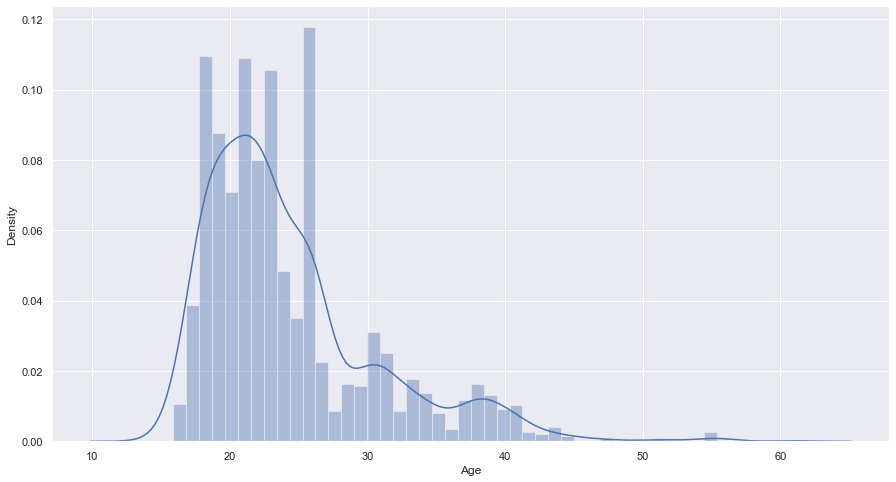

In [154]:
sns.distplot(df["Age"])
plt.show()

/Users/andreaslebec/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/andreaslebec/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/andreaslebec/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

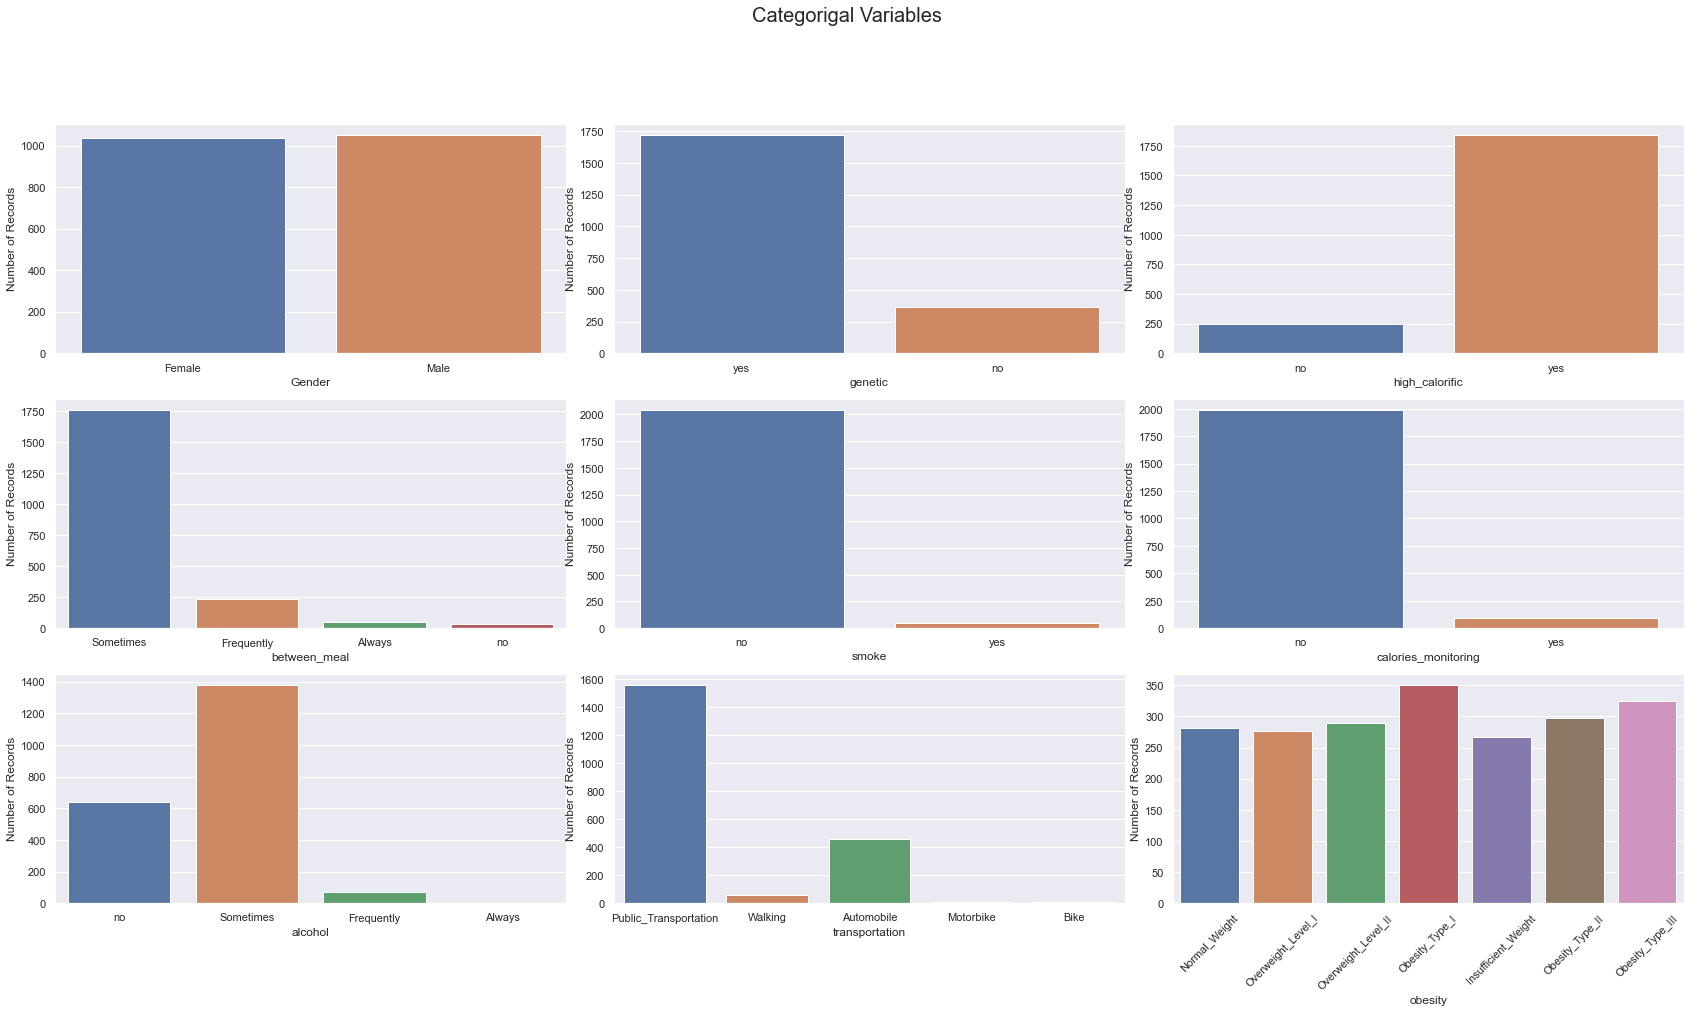

In [160]:
columns = ['Gender', 'genetic', 'high_calorific', 'between_meal', "smoke",
           'calories_monitoring', 'alcohol', 'transportation', 'obesity']

fig, ax = plt.subplots(3, 3, figsize=(25, 15))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col],ax=subplot)  
    subplot.yaxis.label.set_text("Number of Records")
    plt.xticks(rotation=45)
        
# show figure & plots
fig.suptitle("Categorigal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()

In [68]:
df_obesity_3_cat["obesity"].unique()

array(['nor_insu', 'Overweight', 'Obesity'], dtype=object)

In [133]:
df_obesity_4_cat = copy.deepcopy(df)
df_obesity_4_cat.replace("Insufficient_Weight","insufficient",inplace = True)
df_obesity_4_cat.replace("Normal_Weight","normal",inplace = True)
df_obesity_4_cat.replace(["Overweight_Level_I","Overweight_Level_II"],"overweight",inplace = True)
df_obesity_4_cat.replace(["Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"],"obesity",inplace = True)

df_obesity_4_cat_gb = df_obesity_4_cat.groupby("obesity").mean()



In [134]:
df_obesity_4_cat_gb.drop(["Age","Height","Weight"],axis=1,inplace=True)

In [135]:
df_obesity_4_cat_gb

,vegetable,frequence_meal,water,physical_activity,technology_time
obesity,,,,,
insufficient,2.474811,2.942763,1.883852,1.273542,0.847689
normal,2.336879,2.748227,1.858156,1.251773,0.677305
obesity,2.520077,2.716786,2.072639,0.874888,0.603338
overweight,2.269100,2.536973,2.018231,1.007618,0.671338


In [139]:
df_insufficient = df_obesity_4_cat_gb.loc["insufficient",:]
df_normal = df_obesity_4_cat_gb.loc["normal",:]
df_overweight = df_obesity_4_cat_gb.loc["overweight",:]
df_obesity = df_obesity_4_cat_gb.loc["obesity",:]

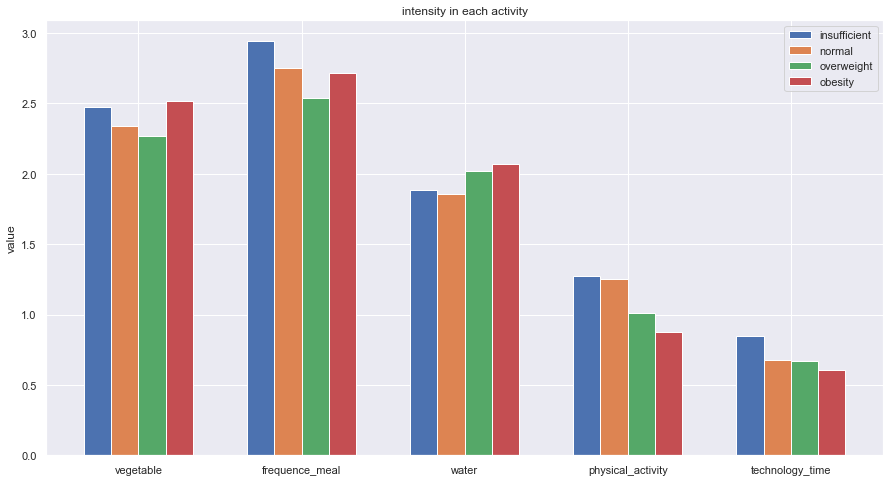

In [149]:
comparaison = df_obesity.index.tolist()
index = np.arange(1,15,3)
bar_width = 0.5

fig, ax = plt.subplots()
insufficient = ax.bar(index-1.5*bar_width,df_insufficient, bar_width,
                label="insufficient")

normal = ax.bar(index-0.5*bar_width,df_normal, bar_width,
                label="normal")

overweight = ax.bar(index+0.5*bar_width, df_overweight,
                 bar_width, label="overweight")

obesity = ax.bar(index+1.5*bar_width, df_obesity,
                 bar_width, label="obesity")

ax.set_ylabel('value')
ax.set_title('intensity in each activity')
ax.set_xticks(index) 
ax.set_xticklabels(comparaison)
ax.legend()

plt.show()

In [161]:
df_IMC = copy.deepcopy(df)
df_IMC['genetic'] = df_IMC['genetic'].map({'yes': 1, 'no': 0})
df_IMC['high_calorific'] = df_IMC['high_calorific'].map({'yes': 1, 'no': 0})
df_IMC['smoke'] = df_IMC['smoke'].map({'yes': 1, 'no': 0})
df_IMC['calories_monitoring'] = df_IMC['calories_monitoring'].map({'yes': 1, 'no': 0})
df_IMC['Gender'] = df_IMC['Gender'].map({'Male': 1, 'Female': 0})
df_IMC['alcohol'] = df_IMC['alcohol'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df_IMC['between_meal'] = df_IMC['between_meal'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df_IMC.drop(["transportation","obesity"], axis = 1, inplace = True)
df_IMC["IMC"] = df_IMC["Weight"]/(df_IMC["Height"]**2)


In [162]:
df_IMC

,Gender,Age,Height,Weight,genetic,high_calorific,vegetable,frequence_meal,between_meal,smoke,water,calories_monitoring,physical_activity,technology_time,alcohol,IMC
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,24.386526
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,24.238227
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,23.765432
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,26.851852
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,44.901475
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,43.741923
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,43.543817
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,44.071535


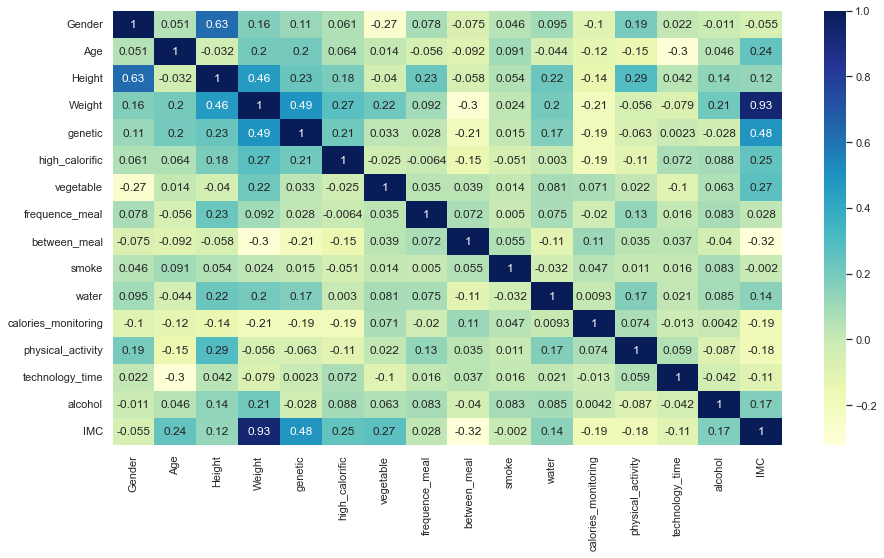

In [178]:
#fig, axs = plt.subplots(1,1, figsize=(10,7))
#sns.heatmap(df_IMC,annot=True, fmt='g', cmap="Reds", ax=axs)
#axs.set_xticklabels(axs.get_xticklabels(), rotation=45, horizontalalignment='right')
ax = sns.heatmap(df_IMC.corr(),cmap="YlGnBu", annot=True) 

/Users/andreaslebec/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


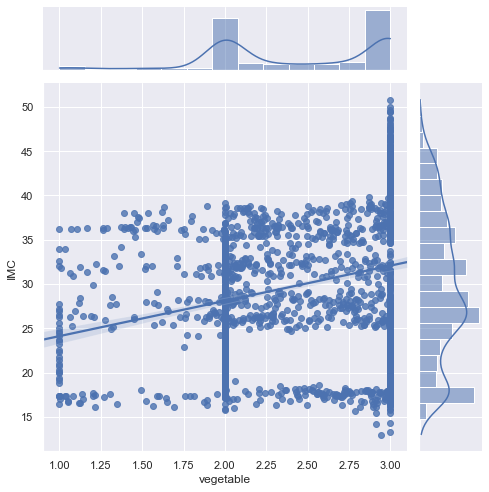

In [172]:
sns.set()
g = sns.jointplot("vegetable", "IMC", data=df_IMC,kind="reg", truncate=False, height=7)